# Importation des librairies et des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
import nltk
import string
import gensim
import time
import cv2
import transformers
import os


from tensorflow.keras import backend as K
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from sklearn import preprocessing

from transformers import *
from transformers import TFAutoModel

from collections import Counter

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer


from os import listdir


from matplotlib.image import imread


os.environ["TF_KERAS"]='1'


C:\Users\nessi\anaconda3\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [235]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

# Exploration des données

In [236]:
data.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04 07:25:36 +0000,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
7,dd0e3470a7e6ed76fd69c2da27721041,2015-12-04 07:25:36 +0000,http://www.flipkart.com/t-star-uft-tsw-005-bk-...,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",WATECFFVGFZPAD3D,999.0,399.0,dd0e3470a7e6ed76fd69c2da27721041.jpg,False,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
8,41384da51732c0b4df3de8f395714fbb,2015-12-04 07:25:36 +0000,http://www.flipkart.com/alfajr-wy16b-youth-dig...,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[""Watches >> Wrist Watches >> Alfajr Wrist Wat...",WATECHFU4QGFQEJG,5495.0,4995.0,41384da51732c0b4df3de8f395714fbb.jpg,False,"Alfajr WY16B Youth Digital Watc

In [237]:
data.shape

(1050, 15)

In [238]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

1050 lignes pour 15 colonnes.

<AxesSubplot:title={'center':'Proportion des types de colonne'}, ylabel='None'>

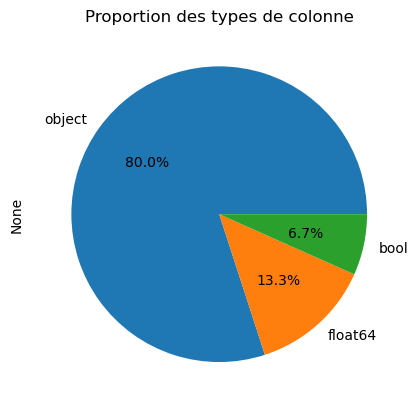

In [239]:
data.dtypes.value_counts().plot(kind='pie', autopct="%1.1f%%", title = "Proportion des types de colonne")

In [240]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

Définition des variables :
- uniq_id : Identifiant unique du produit 
- crawl_timestamp : Date et heure de la dernière visite du produit sur le site
- product_url : Lien URL du produit
- product_name : Nom du produit
- product_category_tree : Catégories et sous catégories du produit
- pid : Identifiant produit
- retail_price : Prix au détail
- discounted_price : Prix réduit
- image : Lien jpg de l'image associé au produit
- is_FK_Advantage_product : Est-ce un produit d'avantage de flipkart ?
- description : Description du produit
- product_rating : Note du produit (Entre 1 et 5)
- overall_rating : Note globale 
- brand : Marque du produit
- product_specifications : Spécifications du produit 

In [241]:
data.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

On note pour les valeurs manquantes :
- 32% pour les marques.
- 0.001% de valeurs manquantes pour les spécifications produits, le prix réduit et le prix au détail.
- 0% pour les 11 autres.

In [242]:
#Doublons
data.duplicated().sum()

0

In [243]:
#Doublons selon l'id
data['uniq_id'].duplicated().sum()

0

In [244]:
#Doublons selon le nom du produit
data['product_name'].duplicated().sum()

0

In [245]:
#Doublons selon l'url du produit
data['product_url'].duplicated().sum()

0

On a pas de doublons que se soit sur l'ensemble des colonnes, ou sur l'id uniquement, les noms de produits uniquement ou l'url produit.

On va se servir des colonnes product_category_tree et description afin de créer nos modèles de NLP. Il convient de nettoyer nos données.

# Nettoyage des données

## Récupération des catégories principales

In [246]:
#Définition de la fonction qui extrait la catégorie principale
def main_category(tree):
    return tree[2:].split(">>")[0][:-1]

In [247]:
#Application de la fonction
data['main_category'] = data['product_category_tree'].apply(main_category)

In [248]:
#Visuel des catégories principales
data['main_category']

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: main_category, Length: 1050, dtype: object

<AxesSubplot:title={'center':"Proportion d'article par catégories"}, ylabel='main_category'>

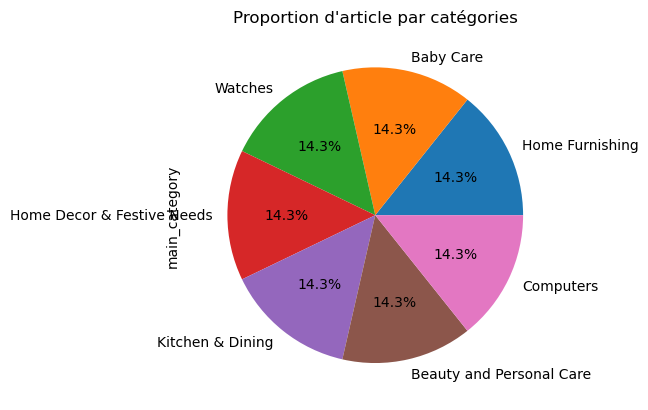

In [249]:
#Observation des proportions de produit par catégorie
data['main_category'].value_counts().plot(kind='pie',autopct="%1.1f%%", title = "Proportion d'article par catégories")

On observe un équilibre parfait entre les différentes catégories. Cela est une très bonne chose pour l'apprentissage de nos modèles de classification.

# Modélisation par NLP

## Pre-processing des données

### Parenthèse mots les plus fréquents

In [250]:
#Visuel de la description du premier produit
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [251]:
#Tokenization
tokenization = data['description'].str.split()

#Somme des mots
tok_sum = tokenization.sum()

#Comptage des occurences de mots dans tous le corpus
word_counts = Counter(tok_sum)

#Affichage des mots les plus couramments utilisés
for w in word_counts.most_common(30):
   print(f"{w[0]}:  \t{w[1]} ")

of:  	1656 
and:  	1167 
the:  	1013 
to:  	982 
-:  	910 
for:  	819 
in:  	748 
Only:  	717 
at:  	701 
with:  	688 
your:  	600 
Rs.:  	584 
For:  	584 
Buy:  	566 
Genuine:  	564 
a:  	555 
is:  	544 
Replacement:  	518 
&:  	492 
30:  	486 
cm:  	473 
Day:  	473 
On:  	425 
Products.:  	413 
Free:  	403 
on:  	402 
Shipping.:  	381 
Cash:  	381 
Delivery!:  	381 
Flipkart.com.:  	379 


## Traitement

In [252]:
#Importation des tokenizers, stopwords et mots
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nessi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nessi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nessi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nessi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [253]:
#Stopwords
stopwords = nltk.corpus.stopwords.words('english')

#Words du corpus
words = set(nltk.corpus.words.words())

#Lemmatizer
lemmatizer = WordNetLemmatizer()

In [254]:
def Preprocess_listofSentence(sentence):
    
    #Tokenizer
    tokenize_sentence = WordPunctTokenizer().tokenize(sentence)
    
    #Passage en minuscule, Suppression de la ponctuation
    sentence_w_punct = [i.lower() for i in tokenize_sentence if i not in string.punctuation]
    
    #Suppression des chiffres
    sentence_w_num = [i for i in sentence_w_punct if not i.isdigit()]
    
    #Suppression des stopwords
    words_w_stopwords = [i for i in sentence_w_num if i not in stopwords]
    
    #Lemmatizer
    words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
    
    #Suppression des lettres seules
    word_sup_one = [i for i in words_lemmatize if len(i) > 1]
    
    #Jointure de tous les mots en une phrase
    sentence_clean = ' '.join(w for w in word_sup_one if w.lower() in words or not w.isalpha())

    return sentence_clean

In [255]:
#Application de la fonction aux descriptions de produits
preprocess_list = data['description'].apply(lambda description : Preprocess_listofSentence(description))

In [256]:
#Visuel de la première description avant application de la fonction
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [257]:
#Visuel de la première description après application de la fonction
preprocess_list[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price curtain look interior curtain made high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant give home bright modernistic appeal design attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight ., specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster25 color multicolor dimension length box number content sale package pack sale package c

# Feature extraction

## CountVectorizer et Tf-idf

In [258]:
# création du bag of words (CountVectorizer et Tf-idf)
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

cv_fit = cvect.fit(preprocess_list)
ctf_fit = ctf.fit(preprocess_list)

cv_transform = cvect.transform(preprocess_list)  
ctf_transform = ctf.transform(preprocess_list) 

In [259]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [260]:
l_cat = list(data['main_category'].unique())
y_cat_num = [1-l_cat.index(data.iloc[i]['main_category']) for i in range(len(data))]
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

CountVectorizer : 
-----------------
ARI :  0.4343 time :  11.0


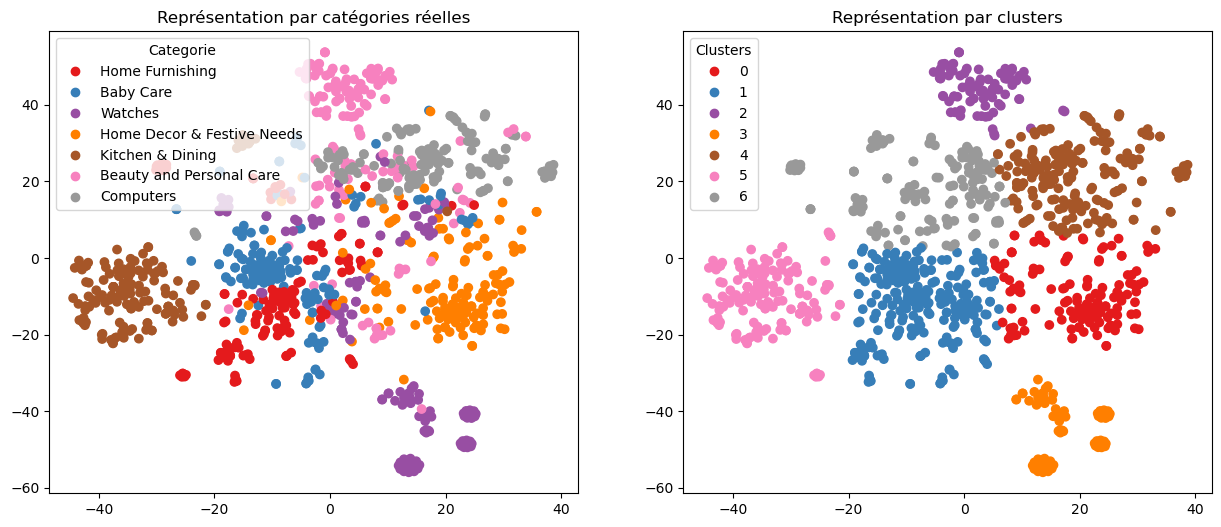

ARI :  0.4343


In [261]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

On observe que l'ARI score est de 0.43 entre la représentation réelle et la représetation par clusters. C'est un score très correct. On observe que certaines catégories (comme les montres) sont très vite cernées par le modèle tandis que d'autres se confondent (Baby Care et Home Furnishing).

Tf-idf : 
--------
ARI :  0.4714 time :  10.0


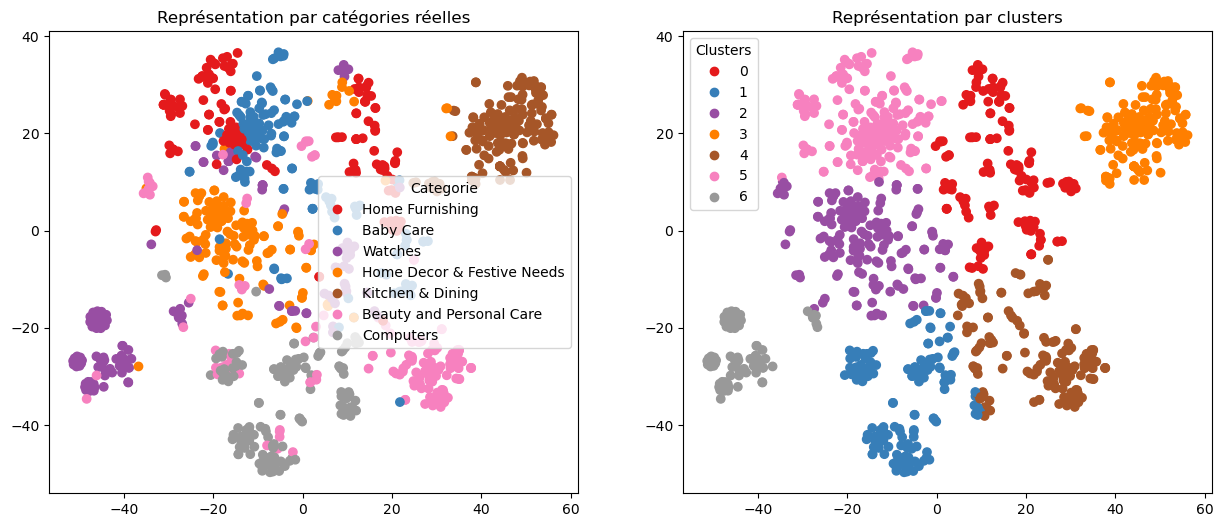

ARI :  0.4714


In [262]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Tf-Idf permet de trouver un ARI score de 0.47, ce qui est encore meilleur qu'avec le count vectorizer. On notera que les techniques de bag-of-words sont assez efficace sur ce corpus.

## Word2Vec 

In [291]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 100 # adapt to length of sentences
sentences = preprocess_list.to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [292]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3351
Word2Vec trained


In [293]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3352


## Matrice d'embedding

In [294]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3352, 300)


## Modèle d'embedding

In [295]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 100)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 100, 300)          1005600   
                                                                 
 global_average_pooling1d_5  (None, 300)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 1005600 (3.84 MB)
Trainable params: 1005600 (3.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Exécution du modèle 

In [296]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [297]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.358 time :  10.0


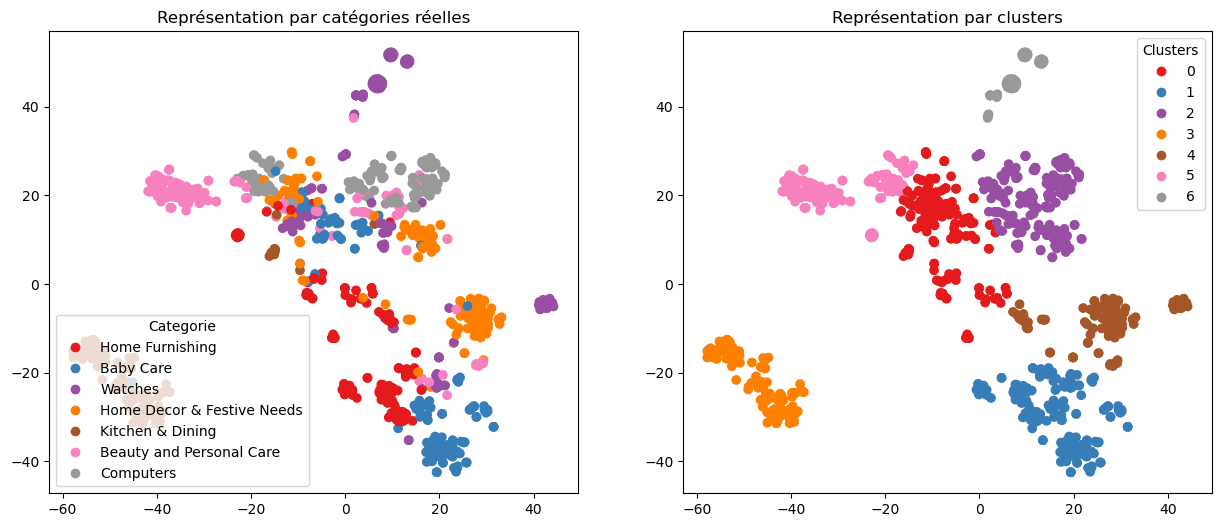

ARI :  0.358


In [298]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

On a un ARI score de 0.35 ce qui est assez faible en comparaison des techniques de bag of words. Cela étant dit, cela marche très bien pour détecter la catégorie Kitchen & Dining.

## BERT

In [299]:
#Copie de data en df
df = data.copy()

In [152]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.13.0
2.13.0
Num GPUs Available:  0
False


In [153]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [154]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['description'].to_list()

loading configuration file config.json from cache at C:\Users\nessi/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at C:\Users\nessi/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64

In [158]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\nessi/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\nessi/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\vocab.t

1/1 [==============================] - 0s 456ms/step
temps traitement :  61.0


In [159]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.0306 time :  11.0


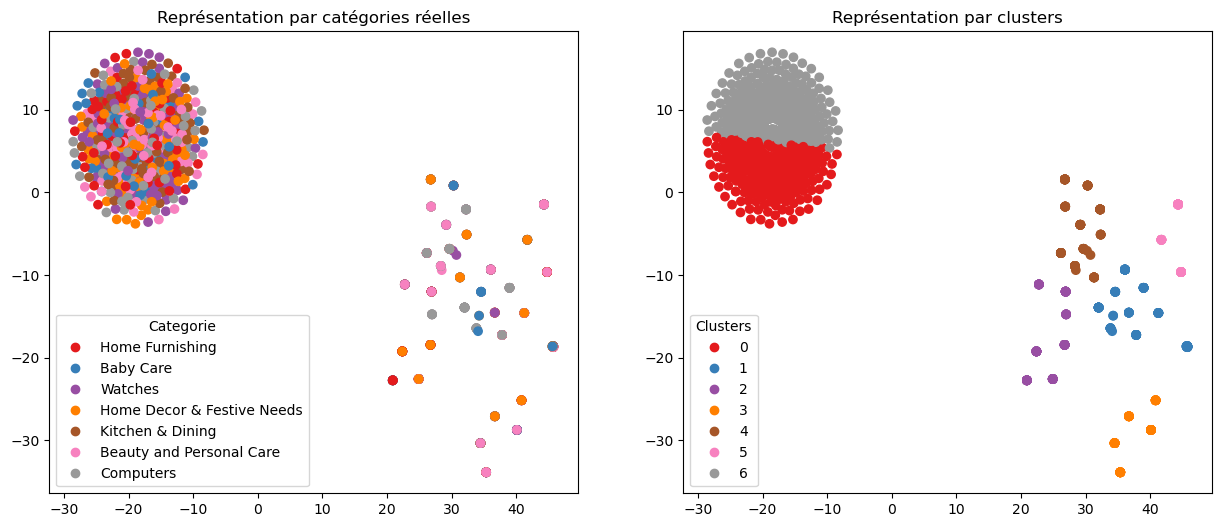

ARI :  0.0306


In [160]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Le modèle BERT nous donne un ARI score de 0.03 ce qui est très faible. On observe sur le graphique qu'il ne réussit pas à faire les distinctions entre les catégories.

# USE

In [162]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.13.0
2.13.0
Num GPUs Available:  0
False


In [302]:
#Importation de l'encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")

In [303]:
#Fonction d'extraction des features
def feature_USE_fct(sentences) :
    features = embed(sentences)['outputs'].numpy()
    return features

In [165]:
sentences = df['description'].to_list()
batch_size = 10
features_USE = feature_USE_fct(sentences)

In [167]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4489 time :  9.0


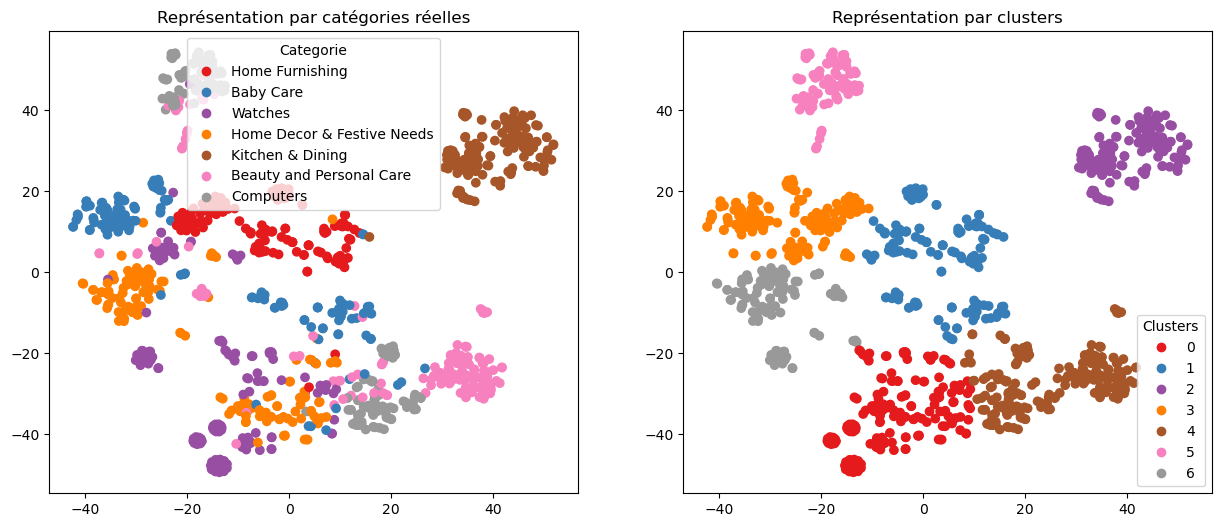

ARI :  0.4489


In [168]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Le modèle USE nous donne un ARI score de 0.44. Ce qui est bien meilleur que le précédent. Il représentera une possibilité dans notre choix de modèle final.

# Modélisation par Image

## Récupération des images

In [305]:
#Extraction des colonnes pertinentes
df_image = df[["image", "main_category"]]

In [306]:
#Chemin d'accès aux photos
path = "..\Projet_6\Images\\"

list_photos = [file for file in listdir(path)]
print(len(list_photos))

df_image.image = df_image.image.apply(lambda x: path+str(x) )

1050


C:\Users\nessi\AppData\Local\Temp\ipykernel_18368\4148644712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_image.image = df_image.image.apply(lambda x: path+str(x) )


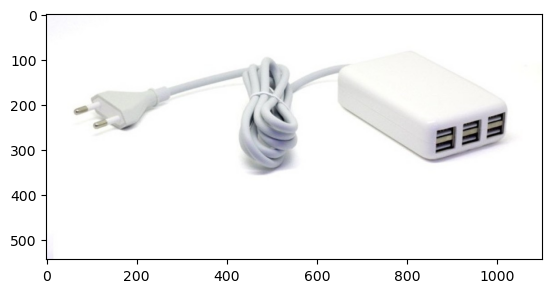

In [307]:
#Affichage d'une photo du dossier
image = imread(path+list_photos[6])
plt.imshow(image)

## Pre-Processing

In [173]:
#Application du LabelEncoder
le = preprocessing.LabelEncoder()
df_image["label"] = le.fit_transform(df_image["main_category"])
df_image

C:\Users\nessi\AppData\Local\Temp\ipykernel_18368\2035613131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_image["label"] = le.fit_transform(df_image["main_category"])


,image,main_category,label
0,..\Projet_6\Images\55b85ea15a1536d46b7190ad6ff...,Home Furnishing,4
1,..\Projet_6\Images\7b72c92c2f6c40268628ec5f14c...,Baby Care,0
2,..\Projet_6\Images\64d5d4a258243731dc7bbb1eef4...,Baby Care,0
3,..\Projet_6\Images\d4684dcdc759dd9cdf41504698d...,Home Furnishing,4
4,..\Projet_6\Images\6325b6870c54cd47be6ebfbffa6...,Home Furnishing,4
...,...,...,...
1045,..\Projet_6\Images\958f54f4c46b53c8a0a9b8167d9...,Baby Care,0
1046,..\Projet_6\Images\fd6cbcc22efb6b761bd564c2892...,Baby Care,0
1047,..\Projet_6\Images\5912e037d12774bb73a2048f35a...,Baby Care,0
1048,..\Projet_6\Images\c3edc504d1b4f0ba6224fa53a43...,Baby Care,0


## Affichage de 3 images par catégorie

Home Furnishing


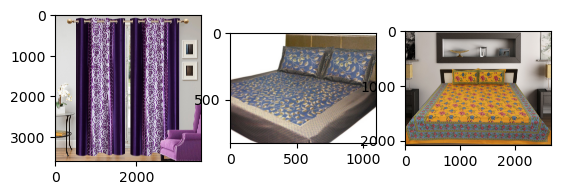

Baby Care


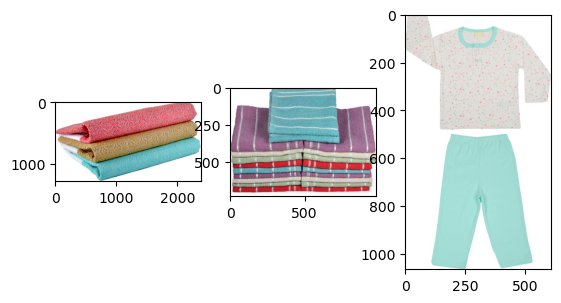

Watches


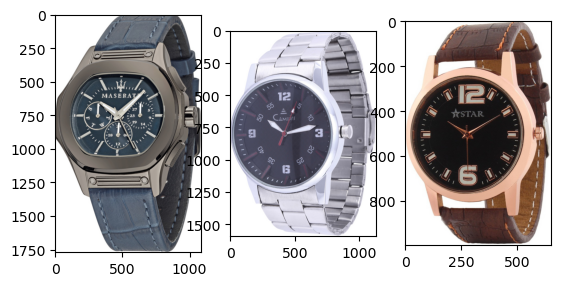

Home Decor & Festive Needs


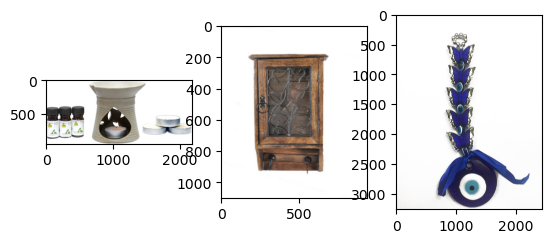

Kitchen & Dining


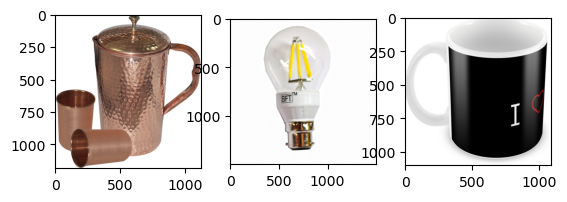

Beauty and Personal Care


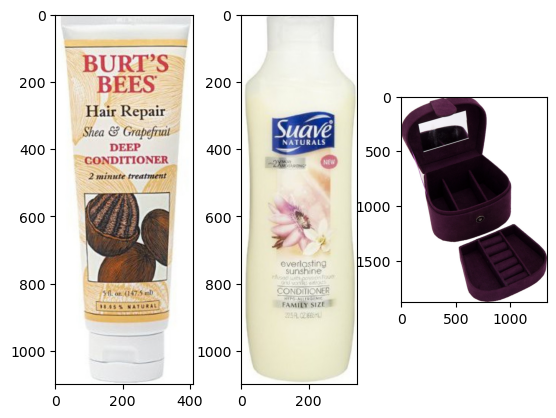

Computers


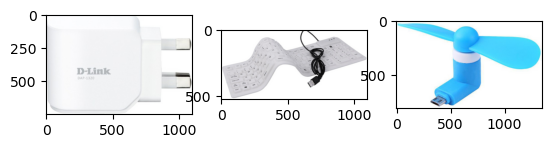

In [174]:
list_labels = list(df_image['main_category'].unique())

for name in list_labels :
    print(name)
    photos = df_image.loc[df_image.main_category == name, 'image'].values[:3]
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        image = imread(photos[i])
        plt.imshow(image)
    plt.show()

## Détermination et affichage des descripteurs

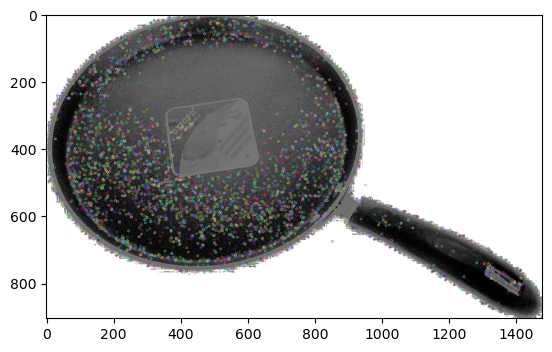

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [175]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

4656 descripteurs de taille 128 chacun

## Créations des descripteurs de chaque image

In [182]:
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)
sift_keypoints_all = np.array([])

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    image_redimensionnee = cv2.resize(res, (224,224), interpolation=cv2.INTER_AREA)
    kp, des = sift.detectAndCompute(image_redimensionnee, None)
    sift_keypoints.append(des)
    #sift_keypoints_all = np.concatenate((sift_keypoints_all, des), axis=0)

#sift_keypoints_by_img = np.asarray(sift_keypoints)
#sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

sift_keypoints_by_img = sift_keypoints #Modification
print()

duration1=time.time()-temps1

0
100
200
300
400
500
600
700
800
900
1000



In [183]:
sift_keypoints_all = sift_keypoints[0]

for i in range(1, len(list_photos)):
    sift_keypoints_all = np.concatenate((sift_keypoints_all, sift_keypoints[i]), axis=0)
    
print("Nombre de descripteurs : ", sift_keypoints_all.shape[0])

Nombre de descripteurs :  314074


On comptabilise un total de 314 074 descripteurs pour les 1050 images.

## Création des clusters de descripteurs

In [187]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  560
Création de 560 clusters de descripteurs ...


C:\Users\nessi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


temps de traitement kmeans :             5.86 secondes


## Création des features des images

In [188]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             3.87 secondes


## Réductions de dimension

In [189]:
#Par une ACP

from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 560)
Dimensions dataset après réduction PCA :  (1050, 452)


In [190]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_image['main_category']
print(df_tsne.shape)


C:\Users\nessi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

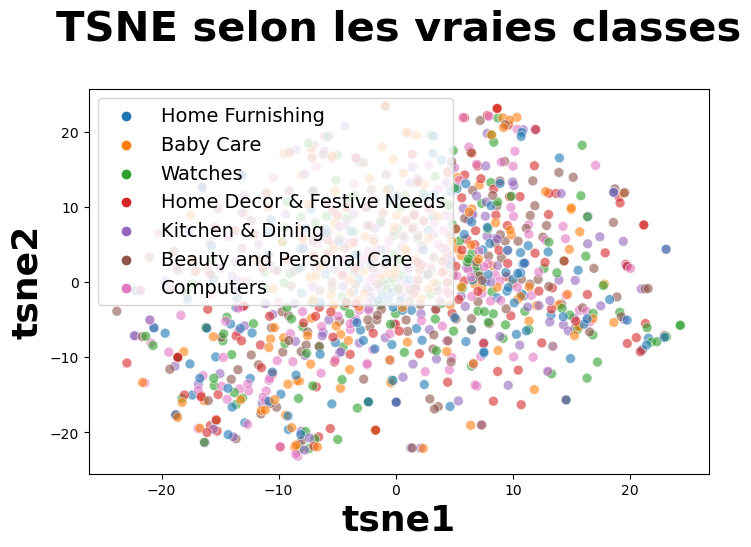

In [191]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [192]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

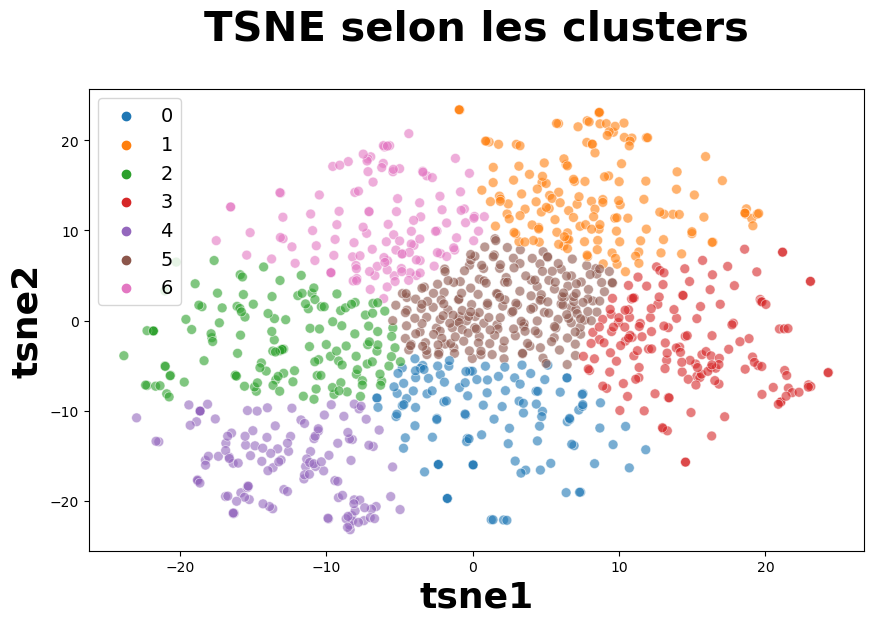

ARI :  -0.0016492327134943517


In [193]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df_image["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

L'ARI score est de 0, cela montre que le modèle n'a pas réussit à saisir les différences entre images.

### Analyse par classes

In [194]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    119
1    155
2    141
3    157
4    130
5    225
6    123
Name: class, dtype: int64

In [195]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[16 25 18 16 20 33 22]
 [20 23 23 18 14 35 17]
 [18 23 22 18 25 32 12]
 [15 26 16 22 20 31 20]
 [18 18 18 31 19 30 16]
 [18 20 24 21 14 35 18]
 [14 20 20 31 18 29 18]]


In [196]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [5,2,4,1,3,0,6]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [5, 2, 4, 1, 3, 0, 6]
[[33 16 25 20 18 16 22]
 [35 18 23 14 23 20 17]
 [32 18 23 25 22 18 12]
 [31 22 26 20 16 15 20]
 [30 31 18 19 18 18 16]
 [35 21 20 14 24 18 18]
 [29 31 20 18 20 14 18]]

              precision    recall  f1-score   support

           0       0.15      0.22      0.18       150
           1       0.11      0.12      0.12       150
           2       0.15      0.15      0.15       150
           3       0.15      0.13      0.14       150
           4       0.13      0.12      0.12       150
           5       0.15      0.12      0.13       150
           6       0.15      0.12      0.13       150

    accuracy                           0.14      1050
   macro avg       0.14      0.14      0.14      1050
weighted avg       0.14      0.14      0.14      1050



<AxesSubplot:>

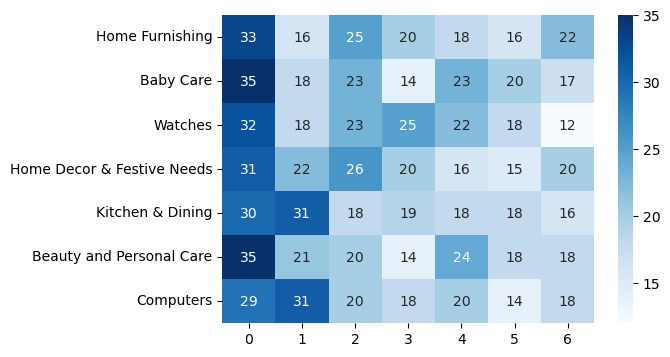

In [197]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# CNN

## Création du modèle pré-entraîné 

In [199]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [200]:
images_features = []
i=0 
for image_file in df_image['image'] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


C:\Users\nessi\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

## Réduction dimension et analyse

### Réduction de dimension PCA

In [201]:
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [202]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

C:\Users\nessi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


temps de T-SNE :             9.47 secondes


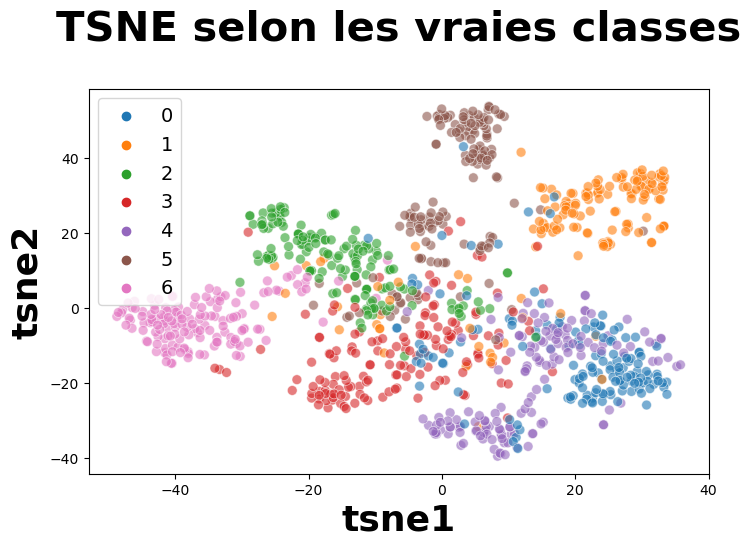

In [204]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_image['label']

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


On observe ici que les clusters 1, 5 et 6 sont bien hétérogène. On voit également que les clusters 0 et 3 bien que mélangés aux autres restent tout de même assez compact. Ce graphique nous montre donc qu'il est possible de séparer les images automatiquements selon leurs vraies classes. Allons plus loin en créant nous même des clusters par des méthodes non supervisées afin d'observer la qualité du clustering (à l'aide de l'ARI score).

### Création de clusters à partir du T-SNE et affichage des images selon clusters

In [205]:
# Création de 7 clusters par K-Means
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

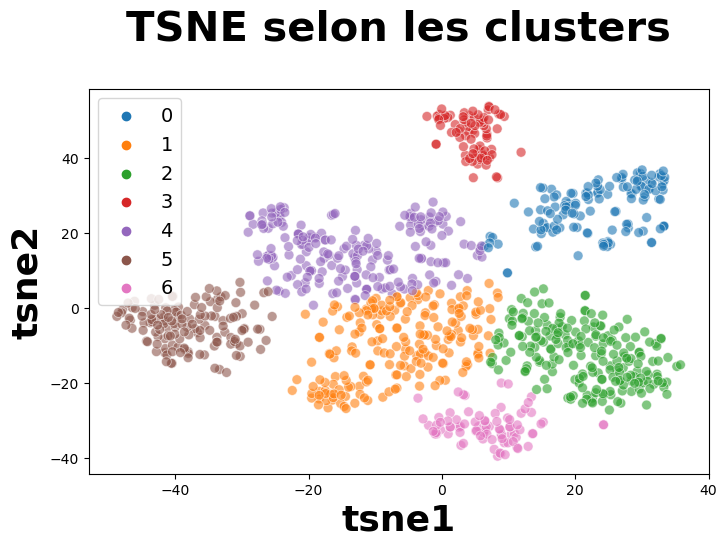

ARI :  0.48254504832362316


In [206]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df_image["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

Le modèle de transfer learning nous donne un ARI score de 0.48 ce qui est très bon. Il réussit même mieux que les modèles de NLPT utilisés précédemment.

In [207]:
for cat in df_image['main_category'].unique():
    print(cat,':', int(df_image.loc[df_image.main_category == cat, 'label'].mean()))

Home Furnishing : 4
Baby Care : 0
Watches : 6
Home Decor & Festive Needs : 3
Kitchen & Dining : 5
Beauty and Personal Care : 1
Computers : 2


In [208]:
list_shine_0 = [i for i in range(len(df_image["image"])) \
                if (df_image.iloc[i]['main_category']=='Baby Care') and (df_tsne.iloc[i]['cluster']==2)]
list_shine_0[0]

1

tsne1       0.208662
tsne2     -14.894537
class       0.000000
cluster     1.000000
Name: 114, dtype: float64


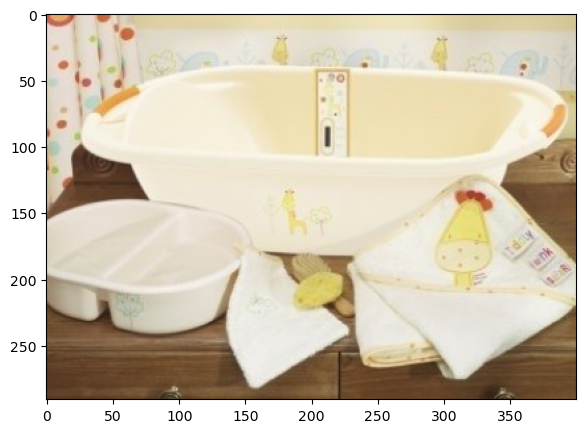

In [209]:
# Affichage image 'Baby Care' considérée comme "Décoration maison"
id = 114
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = df_image["image"][id]
image = imread(filename)
plt.imshow(image)
plt.show()


On observe que le modèle a fait une confusion entre l'utilisation de l'objet ('baby care') avec son apparence. Cela vient du fait que certaines catégories sont visuellement plus proche que d'autres.

### Analyse par classes

In [210]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  4  18 113   1   6   0   8]
 [117  12   8   1  10   1   1]
 [  2  27   1   0 119   1   0]
 [  1 119   9   0  11   4   6]
 [  0   5  77   0   0   0  68]
 [  8  17   2  78  45   0   0]
 [  0   2   0   0  13 135   0]]


In [211]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [212]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [1 3 0 5 2 6 4]
[[113   4   6  18   8   1   0]
 [  8 117  10  12   1   1   1]
 [  1   2 119  27   0   0   1]
 [  9   1  11 119   6   0   4]
 [ 77   0   0   5  68   0   0]
 [  2   8  45  17   0  78   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.54      0.75      0.63       150
           1       0.89      0.78      0.83       150
           2       0.58      0.79      0.67       150
           3       0.59      0.79      0.68       150
           4       0.82      0.45      0.58       150
           5       0.97      0.52      0.68       150
           6       0.96      0.90      0.93       150

    accuracy                           0.71      1050
   macro avg       0.76      0.71      0.71      1050
weighted avg       0.76      0.71      0.71      1050



<AxesSubplot:>

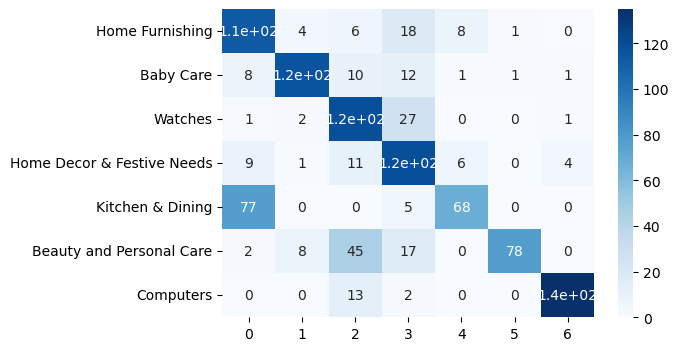

In [213]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

Kitchen & Dining et Beauty Personal Care sont difficile à catégorisés pour notre modèle. Computers lui à tendance à prendre plus de produit qu'il ne faudrait. Pour le reste, cela est assez équilibré.

In [214]:
df_image.to_csv('data.csv', index=False)